# Actividad de evaluación práctica 1
Autor: Álvaro José Álvarez Arranz

# Alternativa 1: Programación de algoritmos

Se ha elegido la programación de dos algoritmos para esta actividad:

* Algoritmo de bñusqueda de la Sección Áurea.
* Método de Newton Multivariante.

## Librerías a usar

A continuación se importarán las librerias usadas para la realización de la práctica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from scipy.optimize import golden, approx_fprime

### Algortimo de la Sección Áurea

Para que el algoritmo de la *Sección Áurea* pueda ser utilizado, la función debe ser **estrictamente convexa** en todo el intervalo a evaluar. Para ello, se puede hacer mediante una función que compruebe esta condición para la función, o se puede hacer más facilmente mediante un grafo como se puede observar a continuación.


#### Función a minimizar.

In [2]:
def f(x):
    return x**2 + 2*x

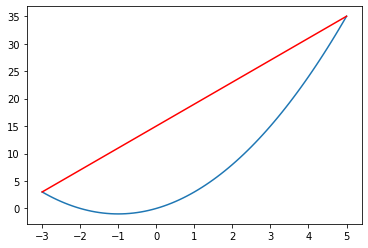

In [3]:
x = np.arange(-3, 5.1, 0.1)
x2 = np.array([-3, 5])
plt.plot(x, f(x))
plt.plot(x2, f(x2), color='red')
plt.show()

Podemos observar que los valores de la función, correspondiente a la línea azul, en el intervalo $(a,b)$ a analizar está por debajo de la recta que une los puntos $(a,\ f(a))$ y $(b,\ f(b))$ dibujada en rojo. Dado que esta condición se cumple, es posible usar el algoritmo de la *sección áurea*.

Dado que el ejemplo programado está en las diapositivas de clase, se puede comprobar su correcto funcionamiento en una comparación con las diapositivas.

#### Código de minimización

A continuación se codifica la función de búsqueda de la sección áurea.

In [4]:
def golden_section(f, l=0.2, x=[0,1]):
    # Cálculo de lambda y mu
    lamb = x[0] + (1 - 0.618) * (x[1] - x[0])
    mu = x[0] + 0.618 * (x[1] - x[0])

    # Mientras l sea menor que la longitud del intervalo
    while l < (x[1]-x[0]):
        # Comprobar si f(lambda) es mayor o igual que f(mu)
        if f(lamb) <= f(mu):
            # Caso 2
            x[1] = mu
            mu = lamb
            lamb = x[0] + (1 - 0.618) * (x[1] - x[0])
        else:
            # Caso 1
            x[0] = lamb
            lamb = mu
            mu = x[0] + 0.618 * (x[1] - x[0])
    return x

#### Ejecución del código y comparación

In [5]:
# Parámetros
l = 0.2 # Longitud del intervalo final
x = np.array([-3.0, 5.0]) # Intervalo inicial

In [6]:
# Ejecutamos la función de la sección áurea programada
golden_section(f, l=l, x=x)

array([-1.111392  , -0.94098666])

Como se puede observar, el resultado obtenido de la ejecución del código es $(-1.1113,\ -0.9409)$, mientras que en las diapositivas el resultado obtenido es $(-1.112,\ -0.936)$, que es un resultado muy similar.

También se puede comprobar que el resultado es el correcto mediante la ejecución de la función `golden` de `scipy.optimize`.

In [7]:
minimizer = golden(f, brack=(x[0], x[1]))
minimizer

-1.0000000040027135

Podemos observar que el valor mínimo obtenido con la librería `optimize` está en el intervalo obtenido con la función de `golden_section` programada y obtenida de las diapositivas.

Para utilizar el código con otra función se debe hacer un cambio en la función `f` definida y comprobar que sea convexa mediante un grafo.

### Método de Newton multivariante

Sobre este método:

* Desvía las direcciones de máximo descenso premultiplicándolas por la matriz Hessiana.
* La motivación es encontrar una dirección adecuada para la aproximación cuadrática de la función a optimizar en vez de encontrar una dirección para la aproximación lineal.

Para la programación del algoritmo se utilizará el ejemplo disponible en las diapositivas de clase

#### Función a minimizar

A continuación se escribe la función a minimizar:

In [8]:
def f_2(x):
    x1, x2 = x
    return (x1 - 2)**4 + (x1 - 2*x2)**2

#### Código de minimización

A continuación, se va a codificar el algoritmo del Método de Newton multivariante:

In [9]:
def multi_newton(f, pto=[0,3], epsilon=0.001):
  # Comprobamos que el valor es menor que epsilon
  while f(pto) >= epsilon:
    # Obtenemos el gradiente de la función f
    # Para ello usaremos la función definida en la librería optimize
    gradiente = approx_fprime(pto, f, epsilon=1e-6)

    # Calculamos la matriz Hessiana H de x
    # Para ello, obtenemos los símbolos
    x = sp.symbols('x:{}'.format(len(pto)))

    # Calculamos la matriz hessiana
    hess = sp.hessian(f(x), x)

    # Evaluar en el punto
    hess_at_point = hess.subs({x[i]: pto[i] for i in range(len(x))})

    # Calculamos hess_at_point**-1
    # Aprovechamos para añadirle el signo negativo para el siguiente cálculo
    hess_inv = hess_at_point.inv().evalf() * -1

    # Calculamos -H**-1 * gradiente
    prod = hess_inv @ gradiente

    # Calculamos x = x - H**-1 * gradiente
    pto = pto + prod

  return pto

#### Ejecución de código y comparación

A continuación vamos a ejecutar el código programado con las condiciones de las diapositivas y comparar el resultado obtenido con el resultado obtenido en las diapositivas.

In [10]:
# Punto inicial
pto = np.array([0, 3])

# Epsilon
epsilon = 0.001

In [11]:
multi_newton(f_2, pto, epsilon)

array([1.82441052330946, 0.912204761654625], dtype=object)

Como podemos observar, el resultado de la ejecución del algoritmo es $(1.8244,\ 0.9122)$ mientras que el resultado obtenido en las diapositivas es $(1.83,\ 0.91)$, que son resultados muy parecidos.